In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
movies = pd.read_csv("dcmarvelmovies.csv")
print(movies.head())
print(movies.isnull().sum())

              Film U.S. release date  \
0         Superman        15/12/1978   
1      Superman II        19/06/1981   
2     Superman III        17/06/1983   
3        Supergirl        21/11/1984   
4  Howard the Duck        01/08/1986   

  Box office gross Domestic (U.S. and Canada )  \
0                                 $134,478,449   
1                                 $108,185,706   
2                                  $59,950,623   
3                                  $14,296,438   
4                                  $16,295,774   

  Box office gross Other territories Box office gross Worldwide       Budget  \
0                       $166,000,000               $300,478,449  $55,000,000   
1                       $108,200,000               $216,385,706  $54,000,000   
2                        $20,300,000                $80,250,623  $39,000,000   
3                                NaN                $14,296,438  $35,000,000   
4                        $21,667,000                $37,96

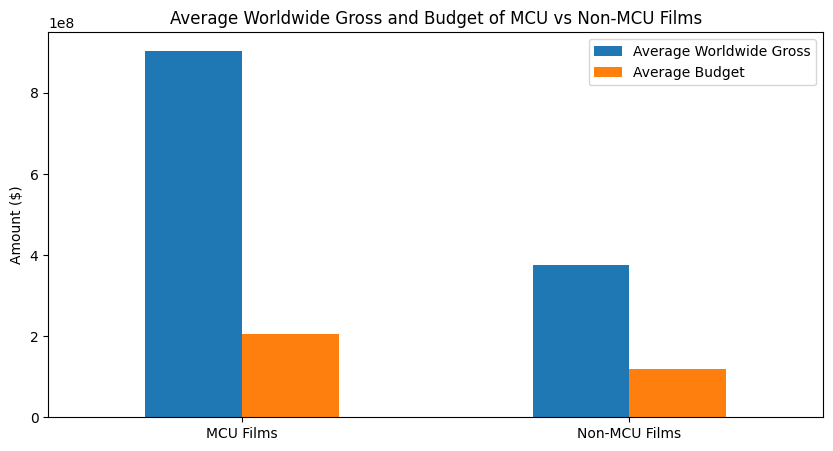

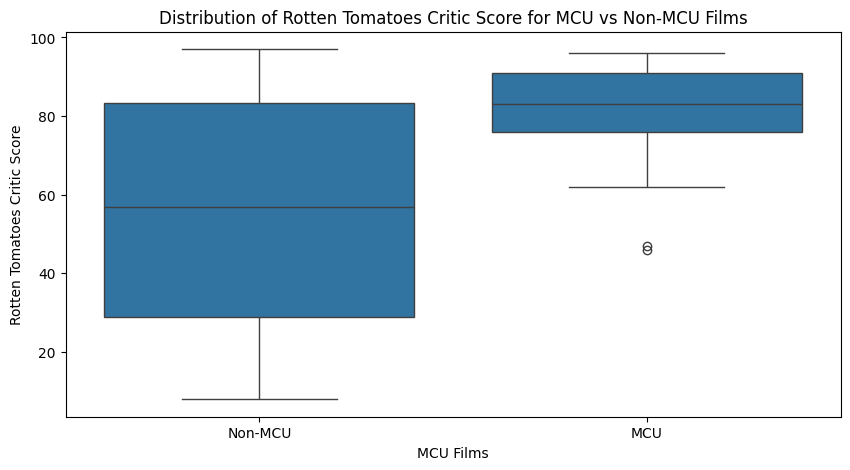

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('dcmarvelmovies.csv')

df['Box office gross Worldwide'] = pd.to_numeric(df['Box office gross Worldwide'].str.replace('[$,]', '', regex=True))
df['Budget'] = pd.to_numeric(df['Budget'].str.replace('[$,]', '', regex=True))
df['Rotten Tomatoes Critic Score'] = pd.to_numeric(df['Rotten Tomatoes Critic Score'], errors='raise')

df['MCU'] = df['MCU']== True


mcu_films = df[df['MCU']]
non_mcu_films = df[~df['MCU']]

mcu_avg = {
    'Average Worldwide Gross': mcu_films['Box office gross Worldwide'].mean(),
    'Average Budget': mcu_films['Budget'].mean()
}
non_mcu_avg = {
    'Average Worldwide Gross': non_mcu_films['Box office gross Worldwide'].mean(),
    'Average Budget': non_mcu_films['Budget'].mean()
}

avg_df = pd.DataFrame([mcu_avg, non_mcu_avg], index=['MCU Films', 'Non-MCU Films'])

avg_df.plot(kind='bar', figsize=(10, 5))
plt.title('Average Worldwide Gross and Budget of MCU vs Non-MCU Films')
plt.ylabel('Amount ($)')
plt.xticks(rotation=0)
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x='MCU', y='Rotten Tomatoes Critic Score', data=df)
plt.title('Distribution of Rotten Tomatoes Critic Score for MCU vs Non-MCU Films')
plt.xlabel('MCU Films')
plt.ylabel('Rotten Tomatoes Critic Score')
plt.xticks(ticks=[0, 1], labels=['Non-MCU', 'MCU'])
plt.show()
